# Example 4: Using the FAR25 wind model

The Wind model provides a array containd the wind speed on x, y and z directions of the inertial frame as a function of the aircraft states.
the FAR25 model has to be initiated with the maximal wind speed, and the starting and finising points of the windy region.

Along the simulation the model has to be updated withe the aircraft states, using the method "set_states(X)", and the wind vector can be extravted using the method "get_windSpeed".

In [2]:
from pyaat.wind import windFAR25
from numpy import linspace, ones, outer, shape

In [3]:
myWind = windFAR25(MaxSpeed = 1, x_start = 10, x_end = 30, y_start = 15, y_end = 20)

x_list = outer(linspace(0, 40, 100), ones(50))

y_list = outer(linspace(10, 25, 50), ones(100)).T

z_list = ones((shape(y_list)[1], shape(x_list)[0]))

X = [0, 0, 0]
for i in range(shape(x_list)[0]):
    x = x_list[i,0]
    for j in range(shape(y_list)[1]):
        y = y_list[0,j]
        X = [x, y, 0]
        myWind.set_states(X)
        z_list[j,i] = myWind.get_windSpeed()[2]
z_list = z_list.T

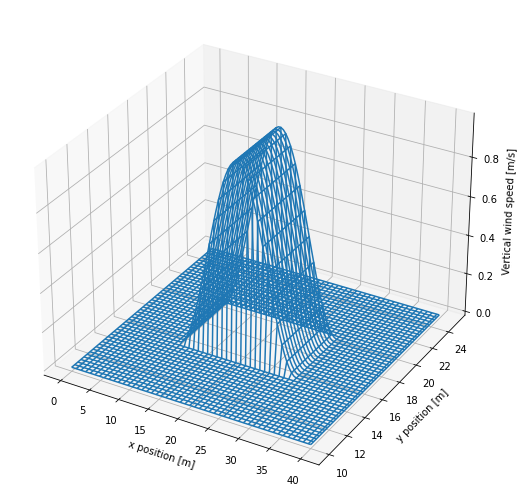

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(x_list, y_list, z_list, cmap=plt.cm.CMRmap)
ax.set_xlabel('x position [m]')
ax.set_ylabel('y position [m]')
ax.set_zlabel('Vertical wind speed [m/s]')

plt.show()